In [ ]:
from zipfile import ZipFile

CONTENT BASED IMAGE RETRIVING


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

# Extract the contents of the zip file
with ZipFile('/content/drive/MyDrive/archive (3).zip', 'r') as zipObj:
    zipObj.extractall('/content/drive/MyDrive')


In [ ]:

import os
import shutil
import random

# Define paths
dataset_dir = '/content/drive/MyDrive/wangdataset'  # Replace with the path to your Wang dataset
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8  # 80% for training, 20% for testing

# Create directories for training and testing sets if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over classes in the dataset directory
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        class_images = os.listdir(class_dir)
        random.shuffle(class_images)  # Randomize the order of images
        split_index = int(len(class_images) * split_ratio)

        # Split images into training and testing sets
        train_images = class_images[:split_index]
        test_images = class_images[split_index:]

        # Copy images to training directory
        for image_name in train_images:
            src_path = os.path.join(class_dir, image_name)
            dest_path = os.path.join(train_dir, class_name, image_name)
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dest_path)

        # Copy images to testing directory
        for image_name in test_images:
            src_path = os.path.join(class_dir, image_name)
            dest_path = os.path.join(test_dir, class_name, image_name)
            os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dest_path)


IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/wangdataset/Images/Images'

In [ ]:
dest_path = os.path.join(test_dir, class_name, image_name)


In [ ]:
dest_path = os.path.join(test_dir, image_name)

In [ ]:

import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to split dataset
def split_dataset(train_dir, test_dir, split_ratio=0.8):
    # Iterate over classes in the training directory
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if os.path.isdir(class_dir):
            class_images = os.listdir(class_dir)
            random.shuffle(class_images)  # Randomize the order of images
            split_index = int(len(class_images) * split_ratio)

            # Split images into training and testing sets
            train_images = class_images[:split_index]
            test_images = class_images[split_index:]

            # Copy images to testing directory
            for image_name in test_images:
                src_path = os.path.join(class_dir, image_name)
                dest_path = os.path.join(test_dir, class_name, image_name)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

# Define paths
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8  # 80% for training, 20% for testing

# Split the dataset
split_dataset(train_dir, test_dir, split_ratio)

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Found 963 images belonging to 1 classes.
Found 465 images belonging to 1 classes.
Epoch 1/10
30/30 [==============================] - 66s 2s/step - loss: 0.0256 - accuracy: 0.9764 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
30/30 [==============================] - 62s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
30/30 [==============================] - 63s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
30/30 [==============================] - 64s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
30/30 [==============================] - 61s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
30/30 [==============================] - 63s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
30/30 [================

In [ ]:
# Extract features using an intermediate layer
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-5].output)

# Extract features from the training data
train_features = feature_extractor.predict(train_generator)

# Extract features from the testing data
test_features = feature_extractor.predict(test_generator)


26/26 [==============================] - 12s 457ms/step


In [ ]:
# Load the query image and resize it to match the input shape of the model
query_image_path = '/content/drive/MyDrive/Images/100.jpg'
query_image = image.load_img(query_image_path, target_size=(100, 100))  # Resize to (100, 100)
query_image_array = image.img_to_array(query_image)
query_image_array = np.expand_dims(query_image_array, axis=0)  # Add batch dimension
query_features = feature_extractor.predict(query_image_array)


1/1 [==============================] - 0s 24ms/step


In [ ]:
# Ensure that both feature vectors have the same dimension
query_features = query_features.flatten()  # Flatten the query features to make it 1D

# Iterate through the training features and compute similarity scores
similarity_scores = []
for features in train_features:
    # Flatten the training features to make it 1D and ensure they have the same length
    features = features.flatten()
    if len(features) == len(query_features):
        # Compute the dot product between the flattened feature vectors
        similarity_score = np.dot(features, query_features)
        similarity_scores.append(similarity_score)
    else:
        print("Warning: Skipping feature with different dimension:", features.shape)

# Check if similarity_scores is not empty
if similarity_scores:
    # Get the index of the most similar image
    most_similar_index = np.argmax(similarity_scores)
    most_similar_image_path = train_generator.filepaths[most_similar_index]
    most_similar_class = os.path.basename(os.path.dirname(most_similar_image_path))

    print("Most similar image:", most_similar_image_path)
    print("Class:", most_similar_class)

    # Load and display the most similar image
    similar_image = Image.open(most_similar_image_path)
    plt.imshow(similar_image)
    plt.axis('off')
    plt.show()
else:
    print("No similarity scores computed successfully.")


No similarity scores computed successfully.


In [ ]:
# Ensure that both feature vectors have the same dimension
query_features = query_features.flatten()  # Flatten the query features to make it 1D

# Print the dimension of query features
print("Query Features Dimension:", query_features.shape)

# Iterate through the training features and compute similarity scores
similarity_scores = []
for features in train_features:
    # Flatten the training features to make it 1D and ensure they have the same length
    features = features.flatten()
    if len(features) == len(query_features):
        # Compute the dot product between the flattened feature vectors
        similarity_score = np.dot(features, query_features)
        similarity_scores.append(similarity_score)
    else:
        print("Warning: Skipping feature with different dimension:", features.shape)

# Check if similarity_scores is not empty
if similarity_scores:
    # Get the index of the most similar image
    most_similar_index = np.argmax(similarity_scores)
    most_similar_image_path = train_generator.filepaths[most_similar_index]
    most_similar_class = os.path.basename(os.path.dirname(most_similar_image_path))

    print("Most similar image:", most_similar_image_path)
    print("Class:", most_similar_class)

    # Load and display the most similar image
    similar_image = Image.open(most_similar_image_path)
    plt.imshow(similar_image)
    plt.axis('off')
    plt.show()
else:
    print("No similarity scores computed successfully.")


Query Features Dimension: (33856,)
No similarity scores computed successfully.


In [ ]:
print("Length of similarity_scores:", len(similarity_scores)
)

Length of similarity_scores: 0


In [ ]:
for features in train_features:
    print("Query features shape:", query_features.shape)
    print("Features shape:", features.shape)

Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features shape: (36, 36, 64)
Query features shape: (33856,)
Features 

In [ ]:
if not similarity_scores:
    print("Warning: No similarity scores were computed.")

In [ ]:
# Ensure that both feature vectors have the same dimension
query_features = query_features.flatten()  # Flatten the query features to make it 1D

# Print the dimension of query features
print("Query Features Dimension:", query_features.shape)

# Iterate through the training features and compute similarity scores
similarity_scores = []
for features in train_features:
    # Flatten the training features to make it 1D and ensure they have the same length
    features = features.flatten()
    # Print the dimension of training features
    print("Training Features Dimension:", features.shape)
    ...


Query Features Dimension: (33856,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Features Dimension: (82944,)
Training Featur

In [ ]:
# Compute the dot product between the flattened feature vectors
similarity_score = np.dot(features, query_features)


ValueError: shapes (82944,) and (33856,) not aligned: 82944 (dim 0) != 33856 (dim 0)

Found 393 images belonging to 1 classes.
Found 848 images belonging to 1 classes.
Epoch 1/10
12/12 [==============================] - 47s 4s/step - loss: 0.0628 - accuracy: 0.9557 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 45s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 42s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 43s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 48s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 66s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
12/12 [================

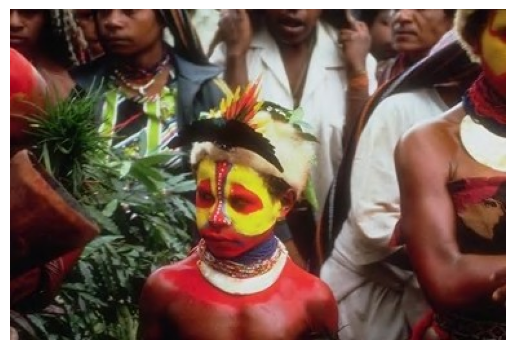

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to split dataset
def split_dataset(train_dir, test_dir, split_ratio=0.8):
    # Iterate over classes in the training directory
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if os.path.isdir(class_dir):
            class_images = os.listdir(class_dir)
            random.shuffle(class_images)  # Randomize the order of images
            split_index = int(len(class_images) * split_ratio)

            # Split images into training and testing sets
            train_images = class_images[:split_index]
            test_images = class_images[split_index:]

            # Copy images to testing directory
            for image_name in test_images:
                src_path = os.path.join(class_dir, image_name)
                dest_path = os.path.join(test_dir, class_name, image_name)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

# Define paths
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8  # 80% for training, 20% for testing

# Split the dataset
split_dataset(train_dir, test_dir, split_ratio)

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Feature extraction
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Function to extract features from a directory
def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 512))  # Assuming the last Dense layer has 512 units
    labels = np.zeros((sample_count))
    generator = train_datagen.flow_from_directory(
        directory,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = feature_extractor.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# Extract features from the training set
train_features, train_labels = extract_features(train_dir, train_generator.samples)

# Load the query image and resize it to match the input shape of the model
query_image_path = '/content/drive/MyDrive/Images/1.jpg'
query_image = image.load_img(query_image_path, target_size=(img_width, img_height))
query_image_array = image.img_to_array(query_image)
query_image_array = np.expand_dims(query_image_array, axis=0)  # Add batch dimension
query_features = feature_extractor.predict(query_image_array)

# Ensure that both feature vectors have the same dimension
query_features = query_features.flatten()  # Flatten the query features to make it 1D

# Iterate through the training features and compute similarity scores
similarity_scores = []
for features in train_features:
    # Flatten the training features to make it 1D and ensure they have the same length
    features = features.flatten()
    if len(features) == len(query_features):
        # Compute the dot product between the flattened feature vectors
        similarity_score = np.dot(features, query_features)
        similarity_scores.append(similarity_score)
    else:
        print("Warning: Skipping feature with different dimension:", features.shape)

# Check if similarity_scores is not empty
if similarity_scores:
    # Get the index of the most similar image
    most_similar_index = np.argmax(similarity_scores)
    most_similar_image_path = train_generator.filepaths[most_similar_index]
    most_similar_class = os.path.basename(os.path.dirname(most_similar_image_path))

    print("Most similar image:", most_similar_image_path)
    print("Class:", most_similar_class)

    # Load and display the most similar image
    similar_image = Image.open(most_similar_image_path)
    plt.imshow(similar_image)
    plt.axis('off')
    plt.show()
else:
    print("No similarity scores computed successfully.")


In [ ]:
import numpy as np
# Sort similarity scores in descending order and get the indices
sorted_indices = np.argsort(similarity_scores)[::-1]

# Extract the paths of the top 5 similar images
top_5_similar_paths = [train_generator.filepaths[idx] for idx in sorted_indices[:5]]

# Load and display the top 5 similar images
for path in top_5_similar_paths:
    similar_image = Image.open(path)
    plt.imshow(similar_image)
    plt.axis('off')
    plt.show()


NameError: name 'similarity_scores' is not defined

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to split dataset
def split_dataset(train_dir, test_dir, split_ratio=0.8):
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if os.path.isdir(class_dir):
            class_images = os.listdir(class_dir)
            random.shuffle(class_images)
            split_index = int(len(class_images) * split_ratio)

            train_images = class_images[:split_index]
            test_images = class_images[split_index:]

            for image_name in test_images:
                src_path = os.path.join(class_dir, image_name)
                dest_path = os.path.join(test_dir, class_name, image_name)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

# Define paths
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8

# Split the dataset
split_dataset(train_dir, test_dir, split_ratio)

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define CNN model
def define_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Train the model
def train_model(model, train_generator, test_generator, batch_size, epochs):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size)
    return history

# Feature extraction
def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 512))
    labels = np.zeros((sample_count))
    generator = train_datagen.flow_from_directory(
        directory,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = feature_extractor.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# Extract features from the training set
def extract_train_features(train_dir, train_generator, batch_size):
    train_features, train_labels = extract_features(train_dir, train_generator.samples)
    return train_features, train_labels

# Load the query image and resize it
def load_query_image(query_image_path, img_width, img_height):
    query_image = image.load_img(query_image_path, target_size=(img_width, img_height))
    query_image_array = image.img_to_array(query_image)
    query_image_array = np.expand_dims(query_image_array, axis=0)
    return query_image_array

# Function to find similar images
def find_similar_images(train_features, query_features):
    similarity_scores = []
    for features in train_features:
        features = features.flatten()
        if len(features) == len(query_features):
            similarity_score = np.dot(features, query_features)
            similarity_scores.append(similarity_score)
        else:
            print("Warning: Skipping feature with different dimension:", features.shape)
    return similarity_scores

# Display top similar images
def display_top_similar_images(train_generator, similarity_scores):
    sorted_indices = np.argsort(similarity_scores)[::-1]
    top_5_similar_paths = [train_generator.filepaths[idx] for idx in sorted_indices[:5]]
    for path in top_5_similar_paths:
        similar_image = Image.open(path)
        plt.imshow(similar_image)
        plt.axis('off')
        plt.show()

# Define and compile the model
model = define_model()

# Train the model
history = train_model(model, train_generator, test_generator, batch_size=32, epochs=10)

# Extract features from training set
train_features, train_labels = extract_train_features(train_dir, train_generator, batch_size)

# Load and preprocess the query image
query_image_path = '/content/drive/MyDrive/Images/1.jpg'
query_image_array = load_query_image(query_image_path, img_width, img_height)

# Feature extraction for query image
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-2].output)
query_features = feature_extractor.predict(query_image_array)
query_features = query_features.flatten()

# Find similar images
similarity_scores = find_similar_images(train_features, query_features)

# Display top similar images
display_top_similar_images(train_generator, similarity_scores)



Found 934 images belonging to 1 classes.
Found 904 images belonging to 1 classes.
Epoch 1/10
29/29 [==============================] - 333s 12s/step - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 68s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 64s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 68s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 77s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 62s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
29/29 [==============

NameError: name 'feature_extractor' is not defined

Found 934 images belonging to 1 classes.
Found 914 images belonging to 1 classes.
Epoch 1/10
29/29 [==============================] - 77s 3s/step - loss: 0.0249 - accuracy: 0.9945 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 69s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 68s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 64s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 69s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 69s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
29/29 [================

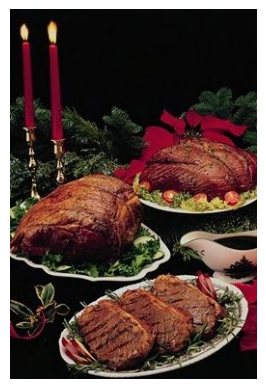

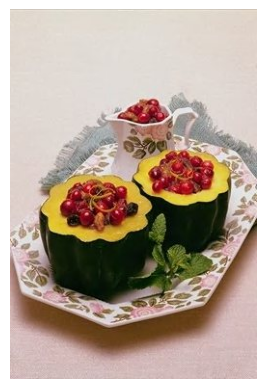

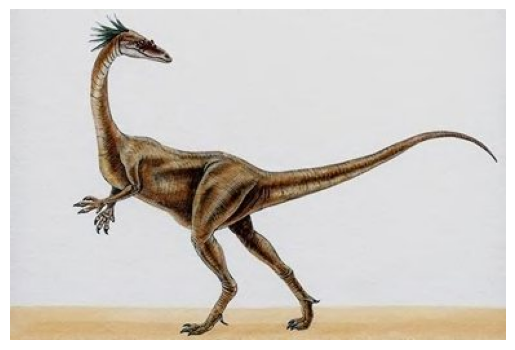

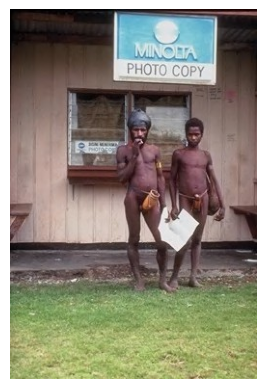

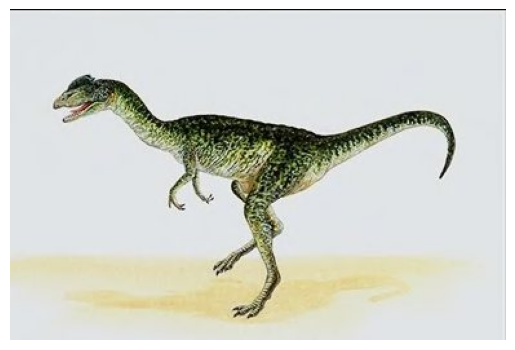

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to split dataset
def split_dataset(train_dir, test_dir, split_ratio=0.8):
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if os.path.isdir(class_dir):
            class_images = os.listdir(class_dir)
            random.shuffle(class_images)
            split_index = int(len(class_images) * split_ratio)

            train_images = class_images[:split_index]
            test_images = class_images[split_index:]

            for image_name in test_images:
                src_path = os.path.join(class_dir, image_name)
                dest_path = os.path.join(test_dir, class_name, image_name)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

# Define paths
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8

# Split the dataset
split_dataset(train_dir, test_dir, split_ratio)

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define CNN model
def define_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Train the model
def train_model(model, train_generator, test_generator, batch_size, epochs):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size)
    return history

# Feature extraction
def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 512))
    labels = np.zeros((sample_count))
    generator = train_datagen.flow_from_directory(
        directory,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = feature_extractor.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# Extract features from the training set
def extract_train_features(train_dir, train_generator, batch_size):
    train_features, train_labels = extract_features(train_dir, train_generator.samples)
    return train_features, train_labels

# Load the query image and resize it
def load_query_image(query_image_path, img_width, img_height):
    query_image = image.load_img(query_image_path, target_size=(img_width, img_height))
    query_image_array = image.img_to_array(query_image)
    query_image_array = np.expand_dims(query_image_array, axis=0)
    return query_image_array

# Function to find similar images
def find_similar_images(train_features, query_features):
    similarity_scores = []
    for features in train_features:
        features = features.flatten()
        if len(features) == len(query_features):
            similarity_score = np.dot(features, query_features)
            similarity_scores.append(similarity_score)
        else:
            print("Warning: Skipping feature with different dimension:", features.shape)
    return similarity_scores

# Display top similar images
def display_top_similar_images(train_generator, similarity_scores):
    sorted_indices = np.argsort(similarity_scores)[::-1]
    top_5_similar_paths = [train_generator.filepaths[idx] for idx in sorted_indices[:5]]
    for path in top_5_similar_paths:
        similar_image = Image.open(path)
        plt.imshow(similar_image)
        plt.axis('off')
        plt.show()

# Define and compile the model
model = define_model()

# Train the model
history = train_model(model, train_generator, test_generator, batch_size=32, epochs=10)

# Feature extraction
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Extract features from training set
train_features, train_labels = extract_train_features(train_dir, train_generator, batch_size)

# Load and preprocess the query image
query_image_path = '/content/drive/MyDrive/Images/1.jpg'
query_image_array = load_query_image(query_image_path, img_width, img_height)

# Feature extraction for query image
query_features = feature_extractor.predict(query_image_array)
query_features = query_features.flatten()

# Find similar images
similarity_scores = find_similar_images(train_features, query_features)

# Display top similar images
display_top_similar_images(train_generator, similarity_scores)


Found 934 images belonging to 1 classes.
Found 927 images belonging to 1 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


29/29 [==============================] - 71s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
29/29 [==============================] - 65s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
29/29 [==============================] - 62s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
29/29 [==============================] - 62s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 62s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 69s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 69s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+0

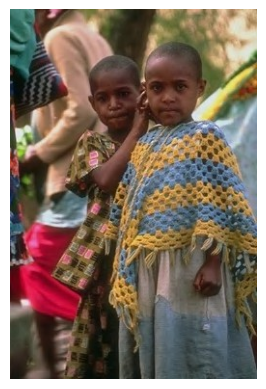

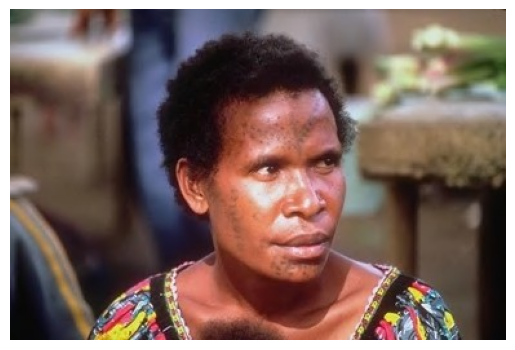

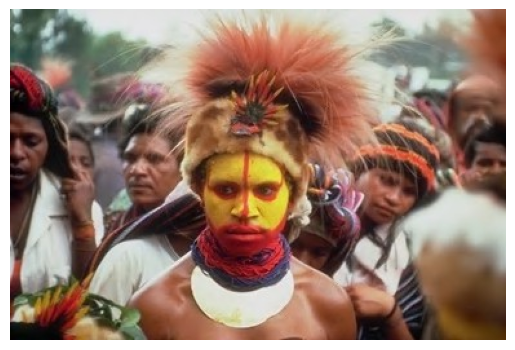

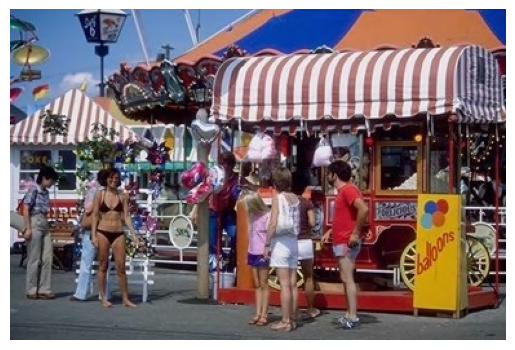

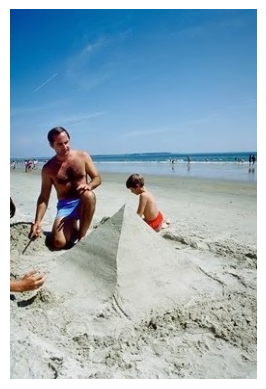

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to split dataset
def split_dataset(train_dir, test_dir, split_ratio=0.8):
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if os.path.isdir(class_dir):
            class_images = os.listdir(class_dir)
            random.shuffle(class_images)
            split_index = int(len(class_images) * split_ratio)

            train_images = class_images[:split_index]
            test_images = class_images[split_index:]

            for image_name in test_images:
                src_path = os.path.join(class_dir, image_name)
                dest_path = os.path.join(test_dir, class_name, image_name)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

# Define paths
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8

# Split the dataset
split_dataset(train_dir, test_dir, split_ratio)

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define CNN model
def define_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(train_generator.num_classes, activation='softmax')  # Output classes dynamically
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Train the model
def train_model(model, train_generator, test_generator, batch_size, epochs):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size)
    return history

# Feature extraction
def extract_features(directory, sample_count):
    features = np.zeros((sample_count, 512))
    labels = np.zeros((sample_count))
    generator = train_datagen.flow_from_directory(
        directory,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = feature_extractor.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = np.argmax(labels_batch, axis=1)
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# Extract features from the training set
def extract_train_features(train_dir, train_generator, batch_size):
    train_features, train_labels = extract_features(train_dir, train_generator.samples)
    return train_features, train_labels

# Load the query image and resize it
def load_query_image(query_image_path, img_width, img_height):
    query_image = image.load_img(query_image_path, target_size=(img_width, img_height))
    query_image_array = image.img_to_array(query_image)
    query_image_array = np.expand_dims(query_image_array, axis=0)
    return query_image_array

# Function to find similar images
def find_similar_images(train_features, train_labels, query_features, query_label):
    similarity_scores = []
    for i, features in enumerate(train_features):
        if train_labels[i] != query_label:
            continue
        features = features.flatten()
        if len(features) == len(query_features):
            similarity_score = np.dot(features, query_features)
            similarity_scores.append((i, similarity_score))
        else:
            print("Warning: Skipping feature with different dimension:", features.shape)
    return similarity_scores

# Display top similar images
def display_top_similar_images(train_generator, similarity_scores):
    sorted_indices = np.argsort([score[1] for score in similarity_scores])[::-1]
    top_5_similar_paths = [train_generator.filepaths[score[0]] for score in similarity_scores[:5]]
    for path in top_5_similar_paths:
        similar_image = Image.open(path)
        plt.imshow(similar_image)
        plt.axis('off')
        plt.show()

# Define and compile the model
model = define_model()

# Train the model
history = train_model(model, train_generator, test_generator, batch_size=32, epochs=10)

# Feature extraction
feature_extractor = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Extract features from training set
train_features, train_labels = extract_train_features(train_dir, train_generator, batch_size)

# Load and preprocess the query image
query_image_path = '/content/drive/MyDrive/Images/1.jpg'
query_image_array = load_query_image(query_image_path, img_width, img_height)

# Feature extraction for query image
query_features = feature_extractor.predict(query_image_array)
query_features = query_features.flatten()

# Get label of query image
query_label = np.argmax(model.predict(query_image_array))

# Find similar images
similarity_scores = find_similar_images(train_features, train_labels, query_features, query_label)

# Display top similar images
display_top_similar_images(train_generator, similarity_scores)


In [ ]:
# Extract features from the training set
train_features, train_labels = extract_features(train_dir, train_generator.samples)

# Load the query image and resize it to match the input shape of the model
query_image_path = '/content/drive/MyDrive/Images/1.jpg'
query_image = image.load_img(query_image_path, target_size=(img_width, img_height))
query_image_array = image.img_to_array(query_image)
query_image_array = np.expand_dims(query_image_array, axis=0)  # Add batch dimension
query_features = feature_extractor.predict(query_image_array)

# Ensure that both feature vectors have the same dimension
query_features = query_features.flatten()  # Flatten the query features to make it 1D

# Store similarity scores and corresponding image paths
similar_images = []

# Iterate through the training features and compute similarity scores
for i, features in enumerate(train_features):
    # Flatten the training features to make it 1D and ensure they have the same length
    features = features.flatten()
    if len(features) == len(query_features):
        # Compute the dot product between the flattened feature vectors
        similarity_score = np.dot(features, query_features)
        similar_images.append((similarity_score, train_generator.filepaths[i]))
    else:
        print("Warning: Skipping feature with different dimension:", features.shape)

# Sort the similar images based on similarity scores
similar_images.sort(reverse=True)

# Print and display the top similar images
num_similar_images = 5
for i in range(num_similar_images):
    similarity_score, similar_image_path = similar_images[i]
    similar_image = Image.open(similar_image_path)
    print(f"Similarity Score: {similarity_score}")
    print("Similar Image:", similar_image_path)
    plt.imshow(similar_image)
    plt.axis('off')
    plt.show()


NameError: name 'extract_features' is not defined

In [ ]:
# Get the index of the most similar image
if similarity_scores:
    most_similar_index = np.argmax(similarity_scores)
    most_similar_image_path = train_generator.filepaths[most_similar_index]
    most_similar_class = os.path.basename(os.path.dirname(most_similar_image_path))
else:
    print("Warning: No most similar image found.")

In [ ]:

import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
def load_and_preprocess_image(image_path):
    # Replace this with your actual image loading and preprocessing logic.
    # For example, you could use OpenCV or PIL to load the image and apply any necessary transformations.
    return np.random.rand(100)  # Return a random vector as a placeholder.

In [ ]:
# Load data
data = []
result = []
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            # Load and preprocess the image
            image_data = load_and_preprocess_image(image_path)
            data.append(image_data)
            result.append(class_name)

In [ ]:
# Convert to numpy arrays
data = np.array(data)
result = np.array(result)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0, train_size=None)

In [ ]:
# Convert to numpy arrays
data = np.array(data)
result = np.array(result)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0, train_size=None)

In [ ]:
import os
import shutil
import random
import numpy as np
from sklearn.model_selection import train_test_split

# Function to split dataset
def split_dataset(train_dir, test_dir, split_ratio=0.8):
    # Iterate over classes in the training directory
    for class_name in os.listdir(train_dir):
        class_dir = os.path.join(train_dir, class_name)
        if os.path.isdir(class_dir):
            class_images = os.listdir(class_dir)
            random.shuffle(class_images)  # Randomize the order of images
            split_index = int(len(class_images) * split_ratio)

            # Split images into training and testing sets
            train_images = class_images[:split_index]
            test_images = class_images[split_index:]

            # Create directories for testing images
            os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

            # Move images to testing directory
            for image_name in test_images:
                src_path = os.path.join(class_dir, image_name)
                dest_path = os.path.join(test_dir, class_name, image_name)
                shutil.move(src_path, dest_path)

# Define paths
train_dir = '/content/drive/MyDrive/Images'
test_dir = '/content/drive/MyDrive/wangdataset/Images'
split_ratio = 0.8  # 80% for training, 20% for testing

# Call function to split dataset
split_dataset(train_dir, test_dir, split_ratio)

# Load data
data = []
result = []
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            # Load image data (You might need to preprocess images based on your requirements)
            # For example:
            # image_data = load_and_preprocess_image(image_path)
            data.append(image_data)
            result.append(class_name)

# Convert to numpy arrays
data = np.array(data)
result = np.array(result)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0, train_size=None)


In [ ]:
print(locals())

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'from zipfile import ZipFile', "from google.colab import drive\ndrive.mount('/content/drive')", "from zipfile import ZipFile\n\n# Extract the contents of the zip file\nwith ZipFile('/content/drive/MyDrive/archive (3).zip', 'r') as zipObj:\n    zipObj.extractall('/content/drive/MyDrive')", 'import tensorflow as tf\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\n# Step 1: Data Preparation\ntrain_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale pixel values to [0, 1] and split data into training and validation sets\n\n# Load training data\ntrain_generator = train_datagen.flow_from_directory(\n    train_dir,\n    target_size=(224, 224),  # Resize images to 224x224 (example

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
image_height = 100
image_width = 100
num_classes = 2

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])